In [1]:
import pandas as pd
import sqlalchemy
from matplotlib import pyplot as plt
import datetime
import copy
import numpy as np
from scipy.stats import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(
    "/home/memari/jhu_centering/tables/device_usage_cleaned.csv")


In [3]:
df


,device_id,date,elapsed_device_on,elapsed_device_off
0,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-19,2059.867325,9058.977986
1,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-20,5478.438835,79157.384791
2,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-21,7987.285942,80162.947736
3,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-22,9316.175104,77363.962594
4,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-23,13422.878653,73212.289174
...,...,...,...,...
2556,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-29,10918.917861,74248.107077
2557,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-30,11998.857603,63072.433905
2558,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-31,31610.016154,48664.681181
2559,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2023-01-01,8131.785642,73785.401312


In [4]:
df_group = pd.read_csv('/data/meditation/majid/surveys/0.csv',
                       skiprows=[1, 2])[['Study ID', 'Group']]
df_group.columns = ['survey_id', 'group']


In [5]:
df_id = pd.read_csv('/home/memari/jhu_centering/tables/id.csv')


In [6]:
df_group = df_id.merge(df_group, on='survey_id', how='left')


In [7]:
df_group


,device_id1,survey_id,device_id2,group_x,group_y
0,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,NaN,Experimental Condition,Experimental Condition
1,f3845ba4-8702-42cf-a14f-051c46f66b61,15027959,NaN,Active Control,Active Control
2,ae02314b-a607-41b9-9507-28ffa1babed7,73386307,NaN,Active Control,Active Control
3,b460f89e-fd76-46ff-a960-989d74fcb66a,87785016,NaN,Active Control,Active Control
4,e5048fab-dc20-4d99-8cea-220a5a2750e0,14851895,NaN,Passive Control,Passive Control
...,...,...,...,...,...
70,780c9b18-72d3-4714-858d-3c91b3719155,21788465,NaN,Active Control,Active Control
71,a1118578-bbb4-47ef-b784-7d5bd09ad8b5,7389236,NaN,Passive Control,Passive Control
72,00e17b8a-4b0f-4230-bd26-3df2853e8916,69546645,NaN,Experimental Condition,Experimental Condition
73,029e57cb-fa0d-479d-abd2-9cb5745f219d,72690342,NaN,Passive Control,Passive Control


In [8]:
df_group.rename(columns={'device_id1': 'device_id'}, inplace=True)


In [9]:
df_group


,device_id,survey_id,device_id2,group_x,group_y
0,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,NaN,Experimental Condition,Experimental Condition
1,f3845ba4-8702-42cf-a14f-051c46f66b61,15027959,NaN,Active Control,Active Control
2,ae02314b-a607-41b9-9507-28ffa1babed7,73386307,NaN,Active Control,Active Control
3,b460f89e-fd76-46ff-a960-989d74fcb66a,87785016,NaN,Active Control,Active Control
4,e5048fab-dc20-4d99-8cea-220a5a2750e0,14851895,NaN,Passive Control,Passive Control
...,...,...,...,...,...
70,780c9b18-72d3-4714-858d-3c91b3719155,21788465,NaN,Active Control,Active Control
71,a1118578-bbb4-47ef-b784-7d5bd09ad8b5,7389236,NaN,Passive Control,Passive Control
72,00e17b8a-4b0f-4230-bd26-3df2853e8916,69546645,NaN,Experimental Condition,Experimental Condition
73,029e57cb-fa0d-479d-abd2-9cb5745f219d,72690342,NaN,Passive Control,Passive Control


In [10]:
df_plot = df.merge(df_group[['device_id', 'group_x']],
                   on='device_id', how='left')


In [11]:
df_plot.columns


Index(['device_id', 'date', 'elapsed_device_on', 'elapsed_device_off',
       'group_x'],
      dtype='object')

In [12]:
df_plot = df_plot[['date', 'elapsed_device_on',
                   'elapsed_device_off', 'group_x']]


In [13]:
grouped = df_plot.groupby(['group_x'])


In [14]:
df_dict = {group: data for group, data in grouped}


In [15]:
active_control = df_dict['Active Control']
experimental_condition = df_dict['Experimental Condition']
passive_control = df_dict['Passive Control']


In [16]:
active_control.columns


Index(['date', 'elapsed_device_on', 'elapsed_device_off', 'group_x'], dtype='object')

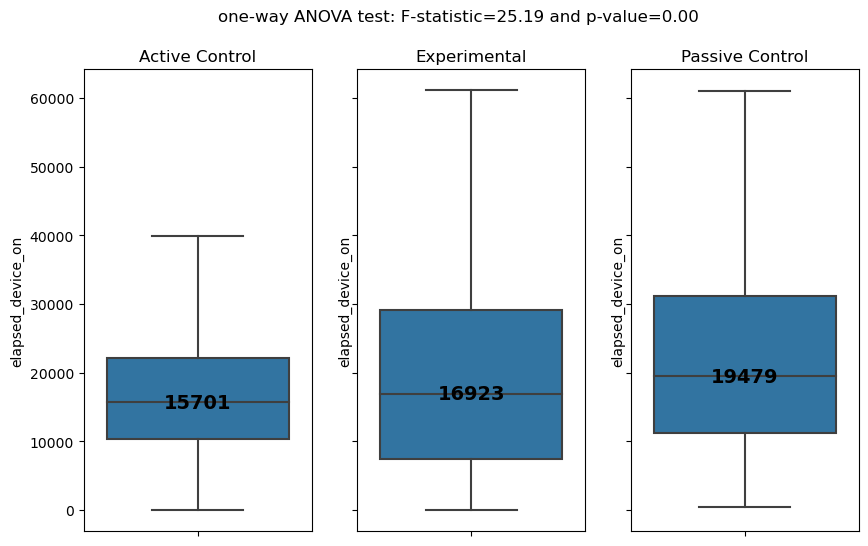

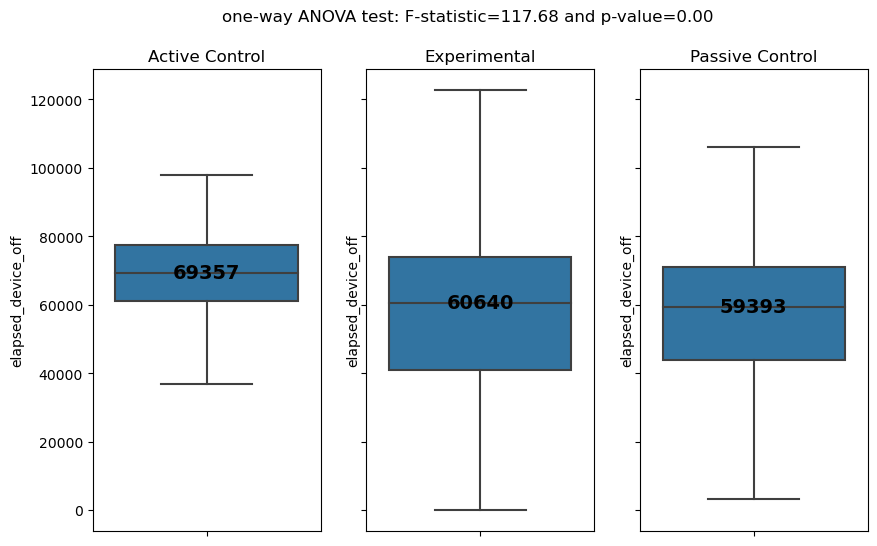

In [17]:

mylist = ['elapsed_device_on', 'elapsed_device_off']

for clm in mylist:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 6), sharey=True)
    sns.boxplot(y=active_control[clm], orient="v", showfliers=False, ax=ax1)
    sns.boxplot(y=experimental_condition[clm],
                orient="v", showfliers=False, ax=ax2)
    sns.boxplot(y=passive_control[clm], orient="v", showfliers=False, ax=ax3)

    ax1.set_title("Active Control")
    m1 = int(active_control[clm].median())
    ax1.text(0, m1, m1, ha='center', va='center',
             fontsize=14, fontdict={'fontweight': 'bold'})
    m2 = int(experimental_condition[clm].median())
    ax2.set_title("Experimental")
    ax2.text(0, m2, m2, ha='center', va='center',
             fontsize=14, fontdict={'fontweight': 'bold'})
    m3 = int(passive_control[clm].median())
    ax3.set_title("Passive Control")
    ax3.text(0, m3, m3, ha='center', va='center',
             fontsize=14, fontdict={'fontweight': 'bold'})

    stat, p = stats.f_oneway(
        active_control[clm], experimental_condition[clm], passive_control[clm])
    mytext = 'one-way ANOVA test: F-statistic={:.2f} and p-value={:.2f}'.format(
        stat, p)
    plt.suptitle(mytext)
    plt.show()
